### Question 1


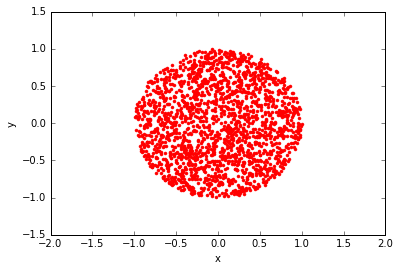

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

N = 2000
x_arr = []
y_arr = []

for i in range(N):
    theta = 2.0*np.pi*np.random.rand(1)
    r = np.sqrt(np.random.rand(1)) #inversion
    x_arr.append(r*np.cos(theta))
    y_arr.append(r*np.sin(theta))

plt.plot(x_arr, y_arr, 'r.')
plt.axis([-2, 2, -1.5, 1.5])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Question 2

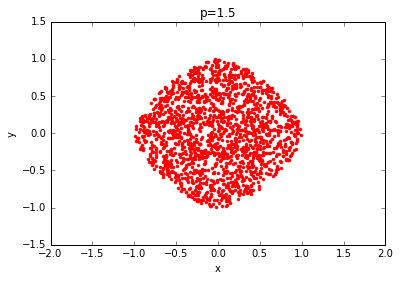

Acceptance rate : 0.87


In [10]:
def gatekeeper(x, y, p):
    xx = np.absolute(x)
    yy = np.absolute(y)
    dist = np.power(np.power(xx,p) + np.power(yy,p), np.power(p,-1))

    if dist <= 1:
        return 1 # inside
    else:
        return 0 # outside

p = 1.5
x_arr = []
y_arr = []
acc = 0 # number of accepted points

for i in range(N):
    theta = 2.0*np.pi*np.random.rand(1)
    r = np.sqrt(np.random.rand(1))
    x = r*np.cos(theta)
    y = r*np.sin(theta)
    
    if gatekeeper(x, y, p):
        acc += 1
        x_arr.append(x)
        y_arr.append(y)

plt.plot(x_arr, y_arr, 'r.')
plt.axis([-2, 2, -1.5, 1.5])
plt.xlabel('x')
plt.ylabel('y')
plt.title('p=1.5')
plt.show()
print('Acceptance rate :', acc/N)

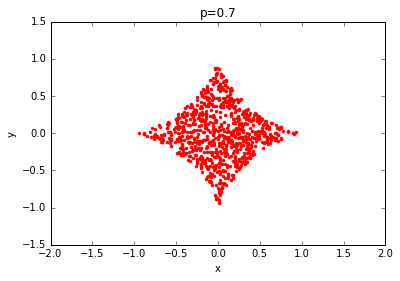

Acceptance rate : 0.4075


In [11]:
p = 0.7
x_arr = []
y_arr = []
acc = 0 # number of accepted points

for i in range(N):
    theta = 2.0*np.pi*np.random.rand(1)
    r = np.sqrt(np.random.rand(1))
    x = r*np.cos(theta)
    y = r*np.sin(theta)
    
    if gatekeeper(x, y, p):
        acc += 1
        x_arr.append(x)
        y_arr.append(y)

plt.plot(x_arr, y_arr, 'r.')
plt.axis([-2, 2, -1.5, 1.5])
plt.xlabel('x')
plt.ylabel('y')
plt.title('p=0.7')
plt.show()
print('Acceptance rate :', acc/N)

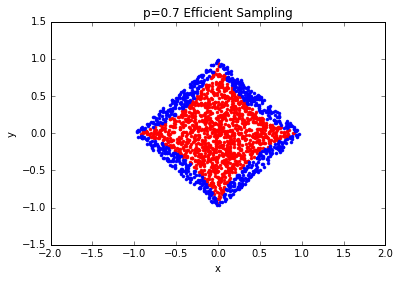

Acceptance rate : 0.6305


In [18]:
# More efficient sampler
# Sample in square, then rotate the square ccw pi/4

p = 0.7
x_arr = []
y_arr = []

x_arr1 = []
y_arr1 = []

acc = 0 # number of accepted points

t = np.pi/4
rot_mat = [[np.cos(t), -np.sin(t)],[np.sin(t),np.cos(t)]]

for i in range(N):
    x = np.random.uniform(-1,1)/np.sqrt(2)
    y = np.random.uniform(-1,1)/np.sqrt(2)
    [x1,y1] = np.dot(rot_mat,[[x],[y]])
    
    if gatekeeper(x1, y1, p):
        acc += 1
        x_arr.append(x1)
        y_arr.append(y1)
    else :
        x_arr1.append(x1)
        y_arr1.append(y1)        

plt.plot(x_arr, y_arr, 'r.')
plt.plot(x_arr1, y_arr1, 'b.')
plt.axis([-2, 2, -1.5, 1.5])
plt.xlabel('x')
plt.ylabel('y')
plt.title('p=0.7 Efficient Sampling')
plt.show()
print('Acceptance rate :', acc/N)

### Bonus